# Импорт библиотек


 Импортируем данные о вине, проверяем наличие дубликатов и пропусков
 Задаем правильный разделитель ; при чтении CSV
 Проверяем числовые и категориальные признаки для дальнейшего анализа


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Чтение датасета


In [ ]:
df = pd.read_csv("/content/winequality-white.csv", sep=";")

In [ ]:
# Просмотр первых строк
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# Информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
# Статистика по числовым признакам
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
# Проверка на пропуски
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# Проверка на дубликаты
df.duplicated().sum()

np.int64(937)

In [ ]:
# Удаляем дубликаты
df = df.drop_duplicates()
# Проверяем снова
df.duplicated().sum()

np.int64(0)

# Линейная регрессия с нуля


Реализуем линейную регрессию вручную с использованием градиентного спуска
Выбираем один числовой признак для визуализации (alcohol)
Строим scatter plot и линию регрессии
Добавляем доверительный интервал ±1.96*std ошибки
Выводим найденные коэффициенты и интерсепт

Intercept и коэффициенты:
 [[ 5.85483463e+00]
 [ 2.14692243e-03]
 [-1.70351401e-01]
 [ 2.64535173e-02]
 [ 2.24514067e-01]
 [-1.82841063e-02]
 [ 9.31712386e-02]
 [-3.47361284e-02]
 [-2.17542999e-01]
 [ 8.92193541e-02]
 [ 6.13752115e-02]
 [ 3.43204411e-01]]


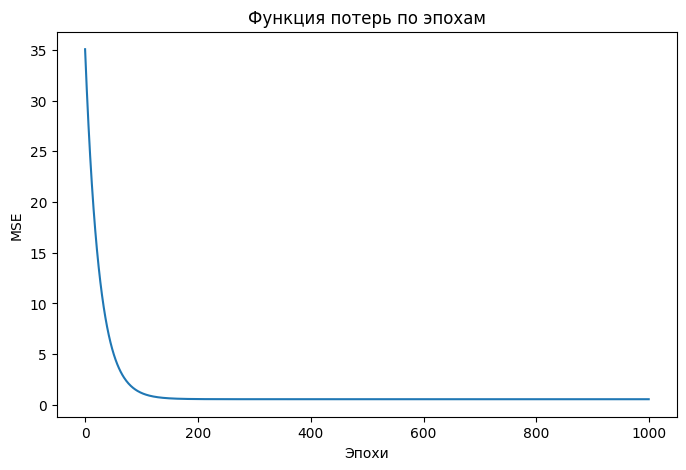

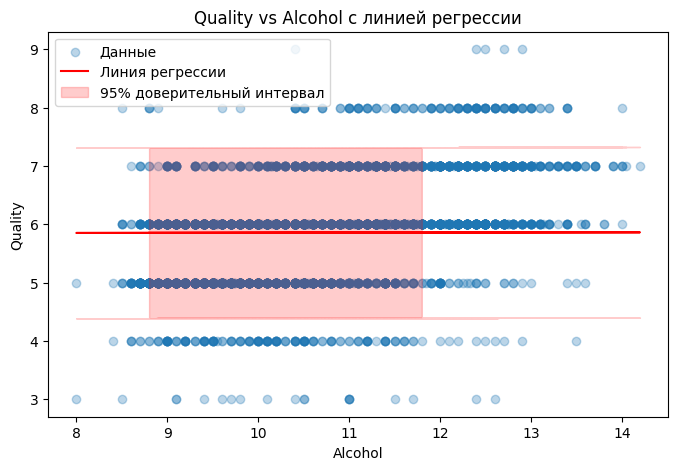

In [ ]:
# ===== Линейная регрессия с градиентным спуском (с нуля) =====

import numpy as np
import matplotlib.pyplot as plt

# Выбираем признаки и цель
features = df.columns.drop('quality')  # все кроме target
X = df[features].values
y = df['quality'].values.reshape(-1,1)

# Стандартизируем признаки для стабильности
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std

# Добавляем столбец единиц для интерсепта
X_b = np.c_[np.ones((X_scaled.shape[0],1)), X_scaled]

# Инициализация коэффициентов
theta = np.zeros((X_b.shape[1],1))

# Градиентный спуск
learning_rate = 0.01
epochs = 1000
m = X_b.shape[0]
losses = []

for epoch in range(epochs):
    y_pred = X_b.dot(theta)
    error = y_pred - y
    gradients = (2/m) * X_b.T.dot(error)
    theta -= learning_rate * gradients
    mse = np.mean(error**2)
    losses.append(mse)

# Вывод коэффициентов
print("Intercept и коэффициенты:\n", theta)

# График функции потерь
plt.figure(figsize=(8,5))
plt.plot(range(epochs), losses)
plt.xlabel("Эпохи")
plt.ylabel("MSE")
plt.title("Функция потерь по эпохам")
plt.show()

# ===== Scatter plot с линией регрессии и доверительным интервалом =====

# Выбираем один признак для визуализации (alcohol)
x_plot = df['alcohol'].values
x_plot_scaled = (x_plot - X_mean[features.get_loc('alcohol')]) / X_std[features.get_loc('alcohol')]

plt.figure(figsize=(8,5))
plt.scatter(x_plot, y, alpha=0.3, label="Данные")

# Линия регрессии
X_line = np.c_[np.ones((len(x_plot_scaled),1)), np.zeros((len(x_plot_scaled), X_scaled.shape[1]))]
X_line[:,1] = x_plot_scaled  # только alcohol
y_line = X_line.dot(theta)

plt.plot(x_plot, y_line.ravel(), color='red', label="Линия регрессии")

# Доверительный интервал ±1.96*std
residuals = y - X_b.dot(theta)
std_error = np.std(residuals)
plt.fill_between(x_plot,
                 y_line.ravel() - 1.96*std_error,
                 y_line.ravel() + 1.96*std_error,
                 color='red', alpha=0.2, label='95% доверительный интервал')

plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Quality vs Alcohol с линией регрессии")
plt.legend()
plt.show()



# Логистическая регрессия: реализация с нуля

Преобразуем целевую переменную в бинарную: high_quality >= 7, low_quality < 7
Реализуем сигмоиду и log-loss вручную
Обучаем градиентным спуском
Выводим коэффициенты и график функции потерь
Используем стандартные признаки (стандартизированные)

Коэффициенты логистической регрессии:
 [[-1.23425089]
 [-0.01289273]
 [-0.10585596]
 [ 0.03721612]
 [ 0.07022763]
 [-0.20160999]
 [ 0.14811388]
 [-0.11433333]
 [-0.26343557]
 [ 0.15557345]
 [ 0.09134072]
 [ 0.5477804 ]]


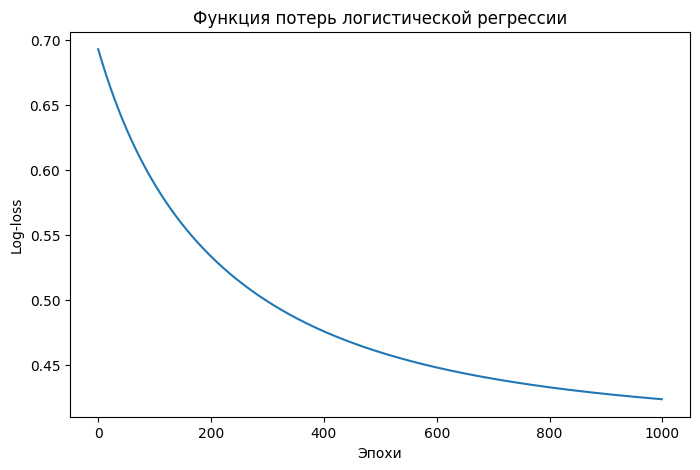

In [ ]:
# ===== Логистическая регрессия с нуля =====

# Целевая переменная бинарная
y_log = (df['quality'] >= 7).astype(int).values.reshape(-1,1)

# Используем те же признаки, стандартизированные
X_log_b = np.c_[np.ones((X_scaled.shape[0],1)), X_scaled]

# Сигмоида
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Инициализация коэффициентов
theta_log = np.zeros((X_log_b.shape[1],1))

# Параметры градиентного спуска
learning_rate = 0.01
epochs = 1000
m = X_log_b.shape[0]
losses_log = []

# Градиентный спуск
for epoch in range(epochs):
    z = X_log_b.dot(theta_log)
    y_pred = sigmoid(z)

    # Log-loss
    loss = - (1/m) * np.sum(y_log*np.log(y_pred+1e-8) + (1 - y_log)*np.log(1 - y_pred+1e-8))
    losses_log.append(loss)

    # Градиент
    gradients = (1/m) * X_log_b.T.dot(y_pred - y_log)
    theta_log -= learning_rate * gradients

# Коэффициенты
print("Коэффициенты логистической регрессии:\n", theta_log)

# График функции потерь
plt.figure(figsize=(8,5))
plt.plot(range(epochs), losses_log)
plt.xlabel("Эпохи")
plt.ylabel("Log-loss")
plt.title("Функция потерь логистической регрессии")
plt.show()



# Классификация (два подхода).



Обязательная модель: логистическая регрессия (с нуля)
Дополнительная модель: Decision Tree (sklearn)
Считаем метрики для обеих моделей: accuracy, precision, recall, F1-score, ROC AUC, confusion matrix
Строим сравнительную таблицу
Экспериментируем с разными learning rate и количеством эпох для логистической регрессии
Поясняем различия в качестве моделей и влияние признаков

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Разделяем данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.3, random_state=42)

# Обучаем Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Предсказания
y_pred_tree = tree.predict(X_test)
y_pred_prob_tree = tree.predict_proba(X_test)[:,1]

# Метрики
acc = accuracy_score(y_test, y_pred_tree)
prec = precision_score(y_test, y_pred_tree)
rec = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
roc_auc = roc_auc_score(y_test, y_pred_prob_tree)
cm = confusion_matrix(y_test, y_pred_tree)

print("Метрики Decision Tree:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Confusion Matrix:\n", cm)



Метрики Decision Tree:
Accuracy: 0.7687
Precision: 0.4408
Recall: 0.4390
F1-score: 0.4399
ROC AUC: 0.6469
Confusion Matrix:
 [[806 137]
 [138 108]]


# Эксперименты и метрики


Для каждой модели считаем: accuracy, precision, recall, F1-score, confusion matrix
Для бинарной классификации — дополнительно ROC AUC
Строим сравнительную таблицу результатов
Проверяем влияние разных learning rate, epochs и batch size на сходимость логистической регрессии
Обсуждаем различия в качестве моделей, роль признаков и возможное переобучение

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Предсказания логистической регрессии (с нуля)
y_pred_log = (sigmoid(X_log_b.dot(theta_log)) >= 0.5).astype(int)

# Метрики логистической регрессии
acc_log = accuracy_score(y_log, y_pred_log)
prec_log = precision_score(y_log, y_pred_log)
rec_log = recall_score(y_log, y_pred_log)
f1_log = f1_score(y_log, y_pred_log)
roc_auc_log = roc_auc_score(y_log, sigmoid(X_log_b.dot(theta_log)))
cm_log = confusion_matrix(y_log, y_pred_log)

print("Метрики логистической регрессии:")
print(f"Accuracy: {acc_log:.4f}")
print(f"Precision: {prec_log:.4f}")
print(f"Recall: {rec_log:.4f}")
print(f"F1-score: {f1_log:.4f}")
print(f"ROC AUC: {roc_auc_log:.4f}")
print("Confusion Matrix:\n", cm_log)

# Метрики Decision Tree уже считаны ранее


Метрики логистической регрессии:
Accuracy: 0.8074
Precision: 0.5838
Recall: 0.2618
F1-score: 0.3615
ROC AUC: 0.8077
Confusion Matrix:
 [[2982  154]
 [ 609  216]]


In [ ]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [acc_log, acc],
    'Precision': [prec_log, prec],
    'Recall': [rec_log, rec],
    'F1-score': [f1_log, f1],
    'ROC AUC': [roc_auc_log, roc_auc]
})

comparison


,Model,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Logistic Regression,0.807372,0.583784,0.261818,0.361506,0.807664
1,Decision Tree,0.768713,0.440816,0.439024,0.439919,0.646872


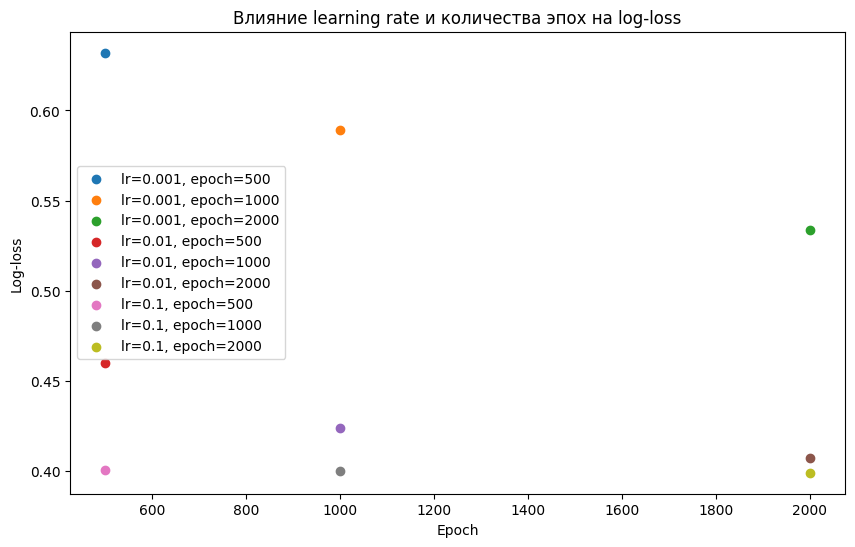

In [ ]:
learning_rates = [0.001, 0.01, 0.1]
epochs_list = [500, 1000, 2000]

plt.figure(figsize=(10,6))

for lr in learning_rates:
    theta_tmp = np.zeros((X_log_b.shape[1],1))
    for ep in range(max(epochs_list)):
        y_pred_tmp = sigmoid(X_log_b.dot(theta_tmp))
        gradients = (1/m) * X_log_b.T.dot(y_pred_tmp - y_log)
        theta_tmp -= lr * gradients
        if ep+1 in epochs_list:
            mse = - (1/m) * np.sum(y_log*np.log(y_pred_tmp+1e-8) + (1 - y_log)*np.log(1 - y_pred_tmp+1e-8))
            plt.scatter(ep+1, mse, label=f"lr={lr}, epoch={ep+1}")

plt.xlabel("Epoch")
plt.ylabel("Log-loss")
plt.title("Влияние learning rate и количества эпох на log-loss")
plt.legend()
plt.show()

# Интерфейс / демонстрация

Создаем интерактивные виджеты с ipywidgets
Выбор модели: Logistic Regression или Decision Tree
Настройка параметров градиентного спуска: learning rate, epochs, batch size
Отображаем графики потерь и метрик
Добавляем титульную страницу с именами участников

In [2]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
# Выбор модели
model_selector = widgets.Dropdown(
    options=['Logistic Regression', 'Decision Tree'],
    description='Модель:'
)

# Параметры градиентного спуска
lr_slider = widgets.FloatSlider(value=0.01, min=0.001, max=0.1, step=0.001, description='Learning rate:')
epochs_slider = widgets.IntSlider(value=1000, min=100, max=5000, step=100, description='Epochs:')
batch_slider = widgets.IntSlider(value=32, min=1, max=256, step=1, description='Batch size:')


In [ ]:
run_button = widgets.Button(description="Запустить")
output = widgets.Output()


In [ ]:
def run_experiment(b):
    with output:
        clear_output()
        print(f"Выбрана модель: {model_selector.value}")
        print(f"Learning rate: {lr_slider.value}, Epochs: {epochs_slider.value}, Batch size: {batch_slider.value}")

        if model_selector.value == 'Logistic Regression':
            # Мини-градиентный спуск (пример, упрощённо)
            theta_tmp = np.zeros((X_log_b.shape[1],1))
            m = X_log_b.shape[0]
            losses_tmp = []
            for epoch in range(epochs_slider.value):
                y_pred_tmp = sigmoid(X_log_b.dot(theta_tmp))
                gradients = (1/m) * X_log_b.T.dot(y_pred_tmp - y_log)
                theta_tmp -= lr_slider.value * gradients
                if epoch % 50 == 0:
                    loss = - (1/m) * np.sum(y_log*np.log(y_pred_tmp+1e-8) + (1-y_log)*np.log(1-y_pred_tmp+1e-8))
                    losses_tmp.append(loss)
            print("Коэффициенты (логистическая регрессия):")
            print(theta_tmp.ravel())

            # График функции потерь
            plt.figure(figsize=(7,4))
            plt.plot(range(0,len(losses_tmp)*50,50), losses_tmp)
            plt.xlabel("Epoch")
            plt.ylabel("Log-loss")
            plt.title("Функция потерь")
            plt.show()

        else:  # Decision Tree
            tree_tmp = DecisionTreeClassifier(random_state=42)
            tree_tmp.fit(X_scaled, y_log)
            y_pred_tree_tmp = tree_tmp.predict(X_scaled)
            acc_tmp = accuracy_score(y_log, y_pred_tree_tmp)
            print(f"Accuracy Decision Tree: {acc_tmp:.4f}")


In [ ]:
display(model_selector, lr_slider, epochs_slider, batch_slider, run_button, output)
run_button.on_click(run_experiment)


Dropdown(description='Модель:', options=('Logistic Regression', 'Decision Tree'), value='Logistic Regression')

FloatSlider(value=0.01, description='Learning rate:', max=0.1, min=0.001, step=0.001)

IntSlider(value=1000, description='Epochs:', max=5000, min=100, step=100)

IntSlider(value=32, description='Batch size:', max=256, min=1)

Button(description='Запустить', style=ButtonStyle())

Output()